In [106]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
import requests
import json

In [107]:
# Load CSV Files into Dataframes
games_file = "data/games.csv"
atbats_file = "data/atbats.csv"
player_name_file = "data/player_names.csv"

games_pd = pd.read_csv(games_file)
atbats_pd = pd.read_csv(atbats_file)
player_name_pd = pd.read_csv(player_name_file)

games_atbats_merge_pd = pd.merge(games_pd, atbats_pd, how="left", on=["g_id"])

games_atbats_merge_pd.columns = ['Attendance',
                                 'Final Score',
                                 'Away Team',
                                 'Game Date',
                                 'Elapsed Time',
                                 'Game ID',
                                 'Home Team Score',
                                 'Home Team',
                                 'Game Start Time',
                                 'Umpire 1',
                                 'Umpire 2',
                                 'Umpire 3',
                                 'Umpire HP',
                                 'Venue',
                                 'Weather',
                                 'Wind',
                                 'Delay Time',
                                 'AtBat ID',
                                 'Player ID',
                                 'Event',
                                 'Inning',
                                 'Outs',
                                 'Score of Pitchers Team',
                                 'Pitcher Hand',
                                 'Pitcher ID',
                                 'Batter Stance',
                                 'Top of the Inning'
                                ]
games_atbats_merge_pd.drop(['Umpire 1', 'Umpire 2','Umpire 3','Umpire HP','Outs','Batter Stance'], inplace=True, axis=1, errors='ignore')
games_atbats_merge_pd.head()

,Attendance,Final Score,Away Team,Game Date,Elapsed Time,Game ID,Home Team Score,Home Team,Game Start Time,Venue,...,Wind,Delay Time,AtBat ID,Player ID,Event,Inning,Score of Pitchers Team,Pitcher Hand,Pitcher ID,Top of the Inning
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000001,572761,Groundout,1,0,L,452657,True
1,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000002,518792,Double,1,0,L,452657,True
2,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000003,407812,Single,1,0,L,452657,True
3,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000004,425509,Strikeout,1,0,L,452657,True
4,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000005,571431,Strikeout,1,0,L,452657,True


In [108]:
# Load CSV Files into Dataframes
games_file = "data/games.csv"
atbats_file = "data/atbats.csv"
player_name_file = "data/player_names.csv"

games_pd = pd.read_csv(games_file)
atbats_pd = pd.read_csv(atbats_file)
player_name_pd = pd.read_csv(player_name_file)

games_atbats_merge_pd = pd.merge(games_pd, atbats_pd, how="left", on=["g_id"])

games_atbats_merge_pd.columns = ['Attendance',
                                 'Final Score',
                                 'Away Team',
                                 'Game Date',
                                 'Elapsed Time',
                                 'Game ID',
                                 'Home Team Score',
                                 'Home Team',
                                 'Game Start Time',
                                 'Umpire 1',
                                 'Umpire 2',
                                 'Umpire 3',
                                 'Umpire HP',
                                 'Venue',
                                 'Weather',
                                 'Wind',
                                 'Delay Time',
                                 'AtBat ID',
                                 'Player ID',
                                 'Event',
                                 'Inning',
                                 'Outs',
                                 'Score of Pitchers Team',
                                 'Pitcher Hand',
                                 'Pitcher ID',
                                 'Batter Stance',
                                 'Top of the Inning'
                                ]
games_atbats_merge_pd.drop(['Umpire 1', 'Umpire 2','Umpire 3','Umpire HP','Outs','Batter Stance'], inplace=True, axis=1, errors='ignore')
games_atbats_merge_pd.head(100)

,Attendance,Final Score,Away Team,Game Date,Elapsed Time,Game ID,Home Team Score,Home Team,Game Start Time,Venue,...,Wind,Delay Time,AtBat ID,Player ID,Event,Inning,Score of Pitchers Team,Pitcher Hand,Pitcher ID,Top of the Inning
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000001,572761,Groundout,1,0,L,452657,True
1,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000002,518792,Double,1,0,L,452657,True
2,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000003,407812,Single,1,0,L,452657,True
3,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000004,425509,Strikeout,1,0,L,452657,True
4,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000005,571431,Strikeout,1,0,L,452657,True
5,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000006,451594,Double,1,1,R,425794,False
6,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000007,624585,Groundout,1,1,R,425794,False
7,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000008,519203,Strikeout,1,1,R,425794,False
8,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000009,516770,Groundout,1,1,R,425794,False
9,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Wrigley Field,...,"7 mph, In from CF",0,2015000010,425877,Strikeout,2,0,L,452657,True


In [109]:
#Merging games_atbats_merge_pd with the player_name_pd
player_name_pd.columns = ['Player ID', 'First Name','Last Name']

In [111]:
# Keala's Player Input Visualization
player_summary_pd = pd.merge(player_name_pd, games_atbats_merge_pd, how="left", on=["Player ID"])
player_summary_pd["Player Name"] = player_summary_pd["First Name"] + " " + player_summary_pd["Last Name"]
player_summary_pd.drop(['First Name', 'Last Name'], inplace=True, axis=1, errors='ignore')

player_stats_pd = player_summary_pd[["Player Name","Event"]]
player_stats_pd_grouped = player_stats_pd.groupby(["Player Name"])['Event'].value_counts()
df1 = pd.DataFrame(player_stats_pd_grouped)
df1.columns = ['Number']
df1

# Resetting the index to the Event
df1 = df1.reset_index(level='Event')

#Pivoting the data to swich the rows and columns
df2 = df1.pivot(columns='Event',values='Number')

# Filling in the NaN values
df3 = df2.fillna(0)
df3

Event,Batter Interference,Bunt Groundout,Bunt Lineout,Bunt Pop Out,Catcher Interference,Double,Double Play,Field Error,Fielders Choice,Fielders Choice Out,...,Sac Bunt,Sac Fly,Sac Fly DP,Sacrifice Bunt DP,Single,Strikeout,Strikeout - DP,Triple,Triple Play,Walk
Player Name,,,,,,,,,,,,,,,,,,,,,
A.J. Burnett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,1.0,0.0,0.0,4.0,20.0,0.0,0.0,0.0,0.0
A.J. Cole,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,2.0,10.0,0.0,0.0,0.0,2.0
A.J. Ellis,0.0,2.0,0.0,2.0,0.0,30.0,4.0,7.0,0.0,1.0,...,11.0,3.0,0.0,0.0,105.0,133.0,2.0,0.0,0.0,85.0
A.J. Griffin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0
A.J. Jimenez,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0
A.J. Morris,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
A.J. Pierzynski,0.0,0.0,0.0,0.0,0.0,39.0,2.0,6.0,2.0,0.0,...,0.0,6.0,0.0,0.0,125.0,66.0,0.0,1.0,0.0,22.0
A.J. Pollock,0.0,1.0,0.0,1.0,0.0,93.0,4.0,14.0,2.0,4.0,...,1.0,16.0,0.0,0.0,254.0,267.0,1.0,17.0,0.0,121.0
A.J. Schugel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


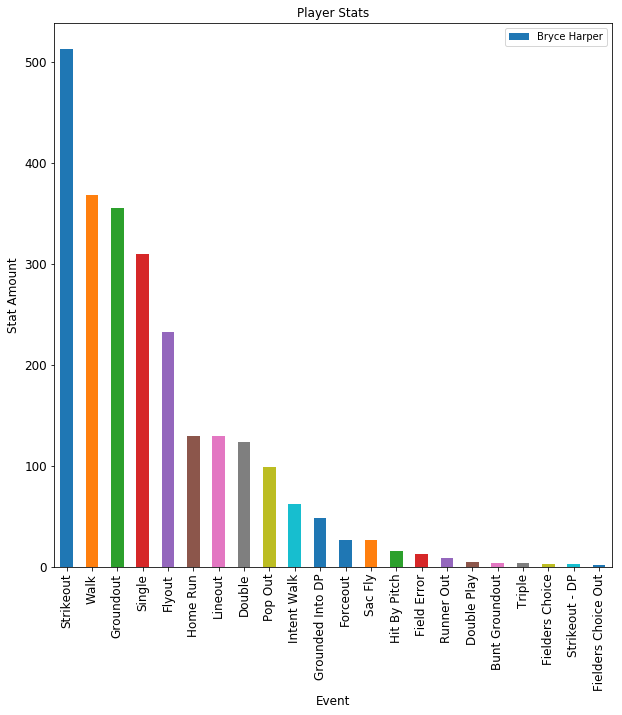

In [161]:
# Plotting the data

# What player do you want to look up?
PlayerName = 'Bryce Harper'

df4 = df1.reset_index()
new_df = df4[df4['Player Name']== PlayerName]
player_info = new_df.plot.bar(x="Event", y="Number", figsize = (10,10), fontsize = 12, title = "Player Stats")
player_info.set_xlabel("Event", fontsize=12)
player_info.set_ylabel("Stat Amount", fontsize=12)
plt.legend([PlayerName])
plt.show()

In [92]:
#Keala's Venue Visualization

# Venue Capacity Dictionary
venue_capacity = {'Wrigley Field':41649, 
                    'Safeco Field':47715,  
                    'Marlins Park':36742,  
                    'Tropicana Field':25000, 
                    'Citizens Bank Park':43035,  
                    'Kauffman Stadium':37903,  
                    'Minute Maid Park':41168,  
                    'Miller Park':41900, 
                    'Comerica Park':41083,  
                    'Nationals Park':41339,  
                    'Great American Ball Park':42319, 
                    'Dodger Stadium':56000,  
                    'Chase Field':48686,  
                    'O.co Coliseum':47170,  
                    'Yankee Stadium':47309,  
                    'Petco Park':40209,  
                    'Coors Field':46897, 
                    'Progressive Field':35041, 
                    'Globe Life Park in Arlington':48114,  
                    'Angel Stadium of Anaheim':45477, 
                    'U.S. Cellular Field':40615,  
                    'Turner Field':49586,  
                    'Oriole Park at Camden Yards':45971, 
                    'AT&T Park':41915, 
                    'PNC Park':38747,  
                    'Target Field':38649,  
                    'Busch Stadium':45494,  
                    'Citi Field':41922, 
                    'Rogers Centre':49282,  
                    'Fenway Park':37755,  
                    'Oakland Coliseum':47170,  
                    'Fort Bragg Field':12500, 
                    'Guaranteed Rate Field':40615,  
                    'SunTrust Park':41084, 
                    'Williamsport Little League Classic':2596,  
                    'Hiram Bithorn Stadium':18264, 
                    'Estadio de Beisbol Monterrey':22061,  
                    'Angel Stadium':45477,  
                    'BB&T Ballpark':10200}

venue_pd = games_atbats_merge_pd[["Attendance","Venue"]]
venue_pd = venue_pd.groupby(["Venue"]).count()

In [93]:
# venue_pd['Percent Attendance'] = ''
venue_pd = venue_pd.reset_index(level = 'Venue')

In [127]:
venue_capacity_df = pd.DataFrame(list(venue_capacity.items()),index=list(range(0,len(venue_capacity))),columns=['Venue','Capacity'])
# venue_capacity_df.head()

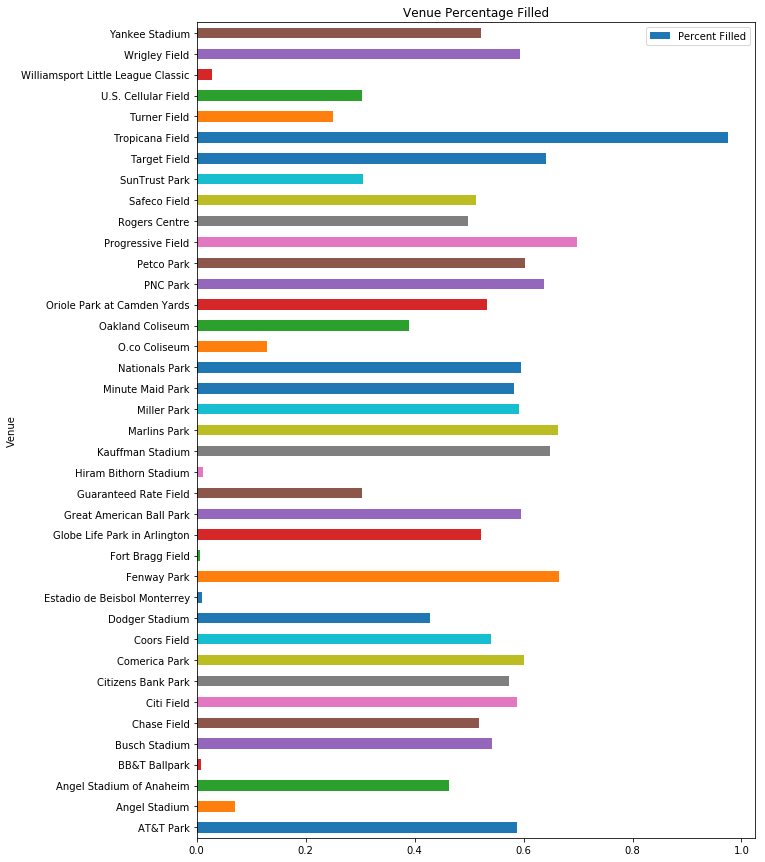

In [128]:
final_venue_pd = pd.merge(venue_pd, venue_capacity_df, how="left", on=["Venue"])
final_venue_pd['Percent Filled'] = final_venue_pd['Attendance']/final_venue_pd['Capacity']
final_venue_pd

# Plotting the venue data - long bar graph
final_venue_pd.plot.barh(x="Venue", y="Percent Filled", title = "Venue Percentage Filled", figsize = (10,15), sort_columns = False)
player_info.set_xlabel("Event", fontsize=14)
player_info.set_ylabel("Percent Filled", fontsize=14)
plt.show()

In [60]:
# venue_capacity.keys()

In [57]:
# for index, row in venue_pd.iterrows():
    
        
        
#         venue_pd.loc[index,venue]=venue_capacity[venue]
#     break
# venue_pd

Wrigley Field
Safeco Field
Marlins Park
Tropicana Field
Citizens Bank Park
Kauffman Stadium
Minute Maid Park
Miller Park
Comerica Park
Nationals Park
Great American Ball Park
Dodger Stadium
Chase Field
O.co Coliseum
Yankee Stadium
Petco Park
Coors Field
Progressive Field
Globe Life Park in Arlington
Angel Stadium of Anaheim
U.S. Cellular Field
Turner Field
Oriole Park at Camden Yards
AT&T Park
PNC Park
Target Field
Busch Stadium
Citi Field
Rogers Centre
Fenway Park
Oakland Coliseum
Fort Bragg Field
Guaranteed Rate Field
SunTrust Park
Williamsport Little League Classic
Hiram Bithorn Stadium
Estadio de Beisbol Monterrey
Angel Stadium
BB&T Ballpark


In [20]:
#Scott's Weather Visualizations - Temp, Conditions & Wind speed

#DATA CHECK
#games_weather_unclean_pd

#Clean up dataframe for games_pd to only show ATTENDANCE, WEATHER, and WIND
games_weather_unclean_pd = games_atbats_merge_pd
games_weather_unclean_pd.drop(['Final Score', 'Away Team', 'Game Date', 'Elapsed Time', 'Game ID', 'Home Team Score', 'Home Team', 'Game Start Time', 'Venue', 'Delay Time', 'AtBat ID', 'Player ID', 'Event', 'Inning', 'Score of Pithcers Team', 'Pitcher Hand', 'Pitcher ID', 'Top of the Inning', 'Score of Pitchers Team'], inplace=True, axis=1, errors='ignore')
weather_pd = games_weather_unclean_pd
weather_pd

#From WEATHER pull out TEMP and CLOUDINESS and add to their own columns (use pandas split)

#From WIND pull out SPEED and DIRECTION and add to their own columns (use pandas split)

#Create Visualizations (matplotlib)

#Visualization 1 - Temperature X vs Attendance Y, Scatterplot
#Visualization 2 - Windspeed X vs Attendance Y, Scatterplot
#Visualization 3 - Wind Direction X vs Attendance Y, Vertical Bar Chart (prefer to show a grouping / heatmap that grows as the attendance grows)
#Visualization 4 - Cloudiness X vs Attendance Y, Vertical Bar Chart (prefer to show a grouping / heatmap that grows as the attendance grows)

,Attendance,Weather,Wind
0,35055,"44 degrees, clear","7 mph, In from CF"
1,35055,"44 degrees, clear","7 mph, In from CF"
2,35055,"44 degrees, clear","7 mph, In from CF"
3,35055,"44 degrees, clear","7 mph, In from CF"
4,35055,"44 degrees, clear","7 mph, In from CF"
5,35055,"44 degrees, clear","7 mph, In from CF"
6,35055,"44 degrees, clear","7 mph, In from CF"
7,35055,"44 degrees, clear","7 mph, In from CF"
8,35055,"44 degrees, clear","7 mph, In from CF"
9,35055,"44 degrees, clear","7 mph, In from CF"


In [5]:
#Kelsey's Time Visualizations - Day of the week, & Time of day

In [ ]:
#Jorge's Stats Visualizations - Home scores/Record

In [ ]:
#Jorge's Stat Visualizations - Average Homeruns at home vs Attendance

In [ ]:
#Kelsey's Home Team vs Visiting team Visualization